In [1]:
import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style, colors
from matplotlib import gridspec
import random
import string
import math

# matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

use all calls from strelka: this is prefered since this takes into consideration of all soamtic calls:snvs and indels, high/moderate/low/modifier impacts.

in most papers, they only report mutation in coding regions including splicing site, excluding non-coding regions, i will get these numbers as well. synonymous/non-synonymous mutation are only in coding regions.

In [117]:
f1 = '/home/szong/projects/resource/hg19a_chromosome_effective_sizes.txt'
df1 = pd.read_csv(f1, sep='\t')
df1.head(2)

,chr,Effective_size
0,1,225280621
1,2,238204518


In [118]:
# approximate size of coding regions 1% of effective genome size
len_coding = df1.Effective_size.sum()*0.01
len_coding

28647851.59

In [2]:
of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
df2 = pd.read_csv(of2, sep='\t')
df2.head(2)

,patient,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
0,HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
1,HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


In [120]:
df2.strelka_coding_mutations.sum()

63260

In [124]:
df2['syno_mut_rate'] = df2.strelka_syno_mutations/len_coding * 1e6
df2['nsyno_mut_rate'] = df2.strelka_nsyno_mutations/len_coding * 1e6

In [127]:
df2['total'] = df2['syno_mut_rate'] + df2['nsyno_mut_rate']

In [130]:
df2.total.sum()/123

17.95279277657801

In [131]:
df2.head(2)

,patient,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,...,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis,syno_mut_rate,nsyno_mut_rate,total
0,HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,...,2001.0,NaN,1.0,1.0,6.0,G2,44.5,3.560476,8.307778,11.868255
1,HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,...,2002.0,3.0,NaN,1.0,11.0,G3,70.2,2.513277,5.410528,7.923805


In [132]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/coding_mutation_rate.txt'
df2.to_csv(of, sep='\t', index=False)

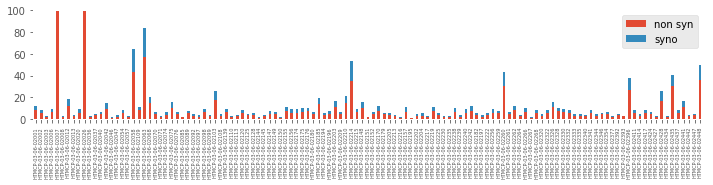

In [126]:
fig = plt.figure(facecolor='white',  figsize=(12,2))
ax = fig.add_subplot(111, facecolor='white')
df2[['nsyno_mut_rate', 'syno_mut_rate']].plot.bar(stacked=True, ax=ax)
ax.set_ylim(0,100)
_ = ax.set_xticklabels(df2.patient, fontsize=5)
_ = ax.legend(labels=['non syn', 'syno'])

In [90]:
def file_len(fname):
    i = 0
    with open(fname) as f:
        for line in f:
            if not re.match("^##", line):
                i+=1
    return i - 1 # header only have one # sign

a good post about match
https://stackoverflow.com/questions/24958358/use-regular-expression-in-python-to-find-two-strings-in-line

In [91]:
def count_coding_mutations(fname):
    
    i = 0
    with open(fname) as f:
        for line in f:
            if not re.match("^##", line):
                if ('HIGH' in line) or ('MODERATE' in line) or ('LOW'in line):
                    i+=1
    return i

In [92]:
def count_synonymous_mutations(fname):
    
    i = 0
    with open(fname) as f:
        for line in f:
            if not re.match("^##", line):
                if ('HIGH' not in line) and ('MODERATE' not in line) and ('LOW'in line):
                    i+=1
    return i

In [112]:
def get_mutations(fname):
    with open(fname) as f:
        for line in f:
            if not re.match("^##", line):
                if ('HIGH' in line) or ('MODERATE' in line) or ('LOW'in line):
                    print(line)
    return 0

In [116]:
# get_mutations(ft)
1183/20558


0.05754450822064403

In [113]:
ft = '/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-03-06-02020/hg19a/GSH/A37247_A56468/strelka/23223/bwa/results/passed.somatic.snvs.eff.dbSNP_v137.cosmic_v64.annotations.vcf'
assert count_coding_mutations(ft) == 266

NameError: name 'count_coding_mutations' is not defined

In [110]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_bam_vcf.txt'
df = pd.read_csv(f1, sep='\t', index_col='patient')
df.head(2)

,HIV_status,DNA_lib,source,status,RNA_lib,ribodepleted_lib,DNA_bam,RNA_bam,DNA_single_vcf,paired_mpileup_vcf,...,other_vcf,DNA_tc,RNA_tc,cnv,bbt_transcriptome,bbt_genome,bbt_transcriptome_other_bacterial,bbt_genome_other_bacterial,bbt_transcriptome_other_viral,bbt_genome_other_viral
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,Positive,A37234,HTMCP_124,Malignant,A37700,A56295,/projects/analysis/analysis22/A37234/merge_bwa...,/projects/analysis/analysis22/IX3433/C67GDANXX...,/projects/analysis/analysis22/A37234/merge_bwa...,NaN,...,NaN,55.0,55.0,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
HTMCP-03-06-02002,Negative,A37235,HTMCP_125,Malignant,A37701,A56296,/projects/analysis/analysis22/A37235/merge_bwa...,/projects/analysis/analysis22/IX3432/C67GDANXX...,/projects/analysis/analysis22/A37235/merge_bwa...,NaN,...,NaN,70.0,70.0,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...


In [111]:
ndf = df[['strelka_snv_vcf', 'strelka_indel_vcf']].dropna()
ndf.head(2)

,strelka_snv_vcf,strelka_indel_vcf
patient,,
HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [96]:
ndf.shape

(124, 2)

In [97]:
ndf['snv_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: file_len(x))
ndf['indel_counts'] = ndf['strelka_indel_vcf'].apply(lambda x: file_len(x))
ndf['snv_sns_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: count_coding_mutations(x))
ndf['indel_sns_counts'] = ndf['strelka_indel_vcf'].apply(lambda x: count_coding_mutations(x))
ndf['snv_syno_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: count_synonymous_mutations(x))
ndf['indel_syno_counts'] = ndf['strelka_indel_vcf'].apply(lambda x: count_synonymous_mutations(x))

In [101]:
ndf['strelka_mutations'] = ndf.snv_counts + ndf.indel_counts
ndf['strelka_coding_mutations'] = ndf.snv_sns_counts + ndf.indel_sns_counts
ndf['strelka_syno_mutations'] = ndf.snv_syno_counts + ndf.indel_syno_counts
ndf['strelka_nsyno_mutations'] = ndf['strelka_coding_mutations'] - ndf['strelka_syno_mutations']
# ndf.drop(['strelka_snv_vcf', 'strelka_indel_vcf'], axis=1, inplace=True)

ndf.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations
patient,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155


In [102]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_strelka_snvs_indels_counts.txt'
ndf.to_csv(of)

In [106]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_strelka_snvs_indels_counts.txt'
df_strelka = pd.read_csv(of, index_col='patient')
df_strelka.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations
patient,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155


In [107]:
df_strelka.min()

snv_counts                  3002
indel_counts                   1
snv_sns_counts                30
indel_sns_counts               0
snv_syno_counts               10
indel_syno_counts              0
strelka_mutations           3033
strelka_coding_mutations      30
strelka_syno_mutations        10
strelka_nsyno_mutations       20
dtype: int64

In [108]:
# df_strelka['log10_snv'] = np.log10(df_strelka.snv +1)
df_strelka['log10_all_mutations'] = np.log10(df_strelka['strelka_mutations'])
df_strelka['log10_coding_mutations'] = np.log10(df_strelka['strelka_coding_mutations'])

In [109]:
df_strelka = df_strelka.query('patient != "HTMCP-03-06-02061"')
assert ('HTMCP-03-06-02061' in df_strelka.index) == False

In [110]:
df_strelka.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,log10_all_mutations,log10_coding_mutations
patient,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,4.430945,2.531479
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,4.221701,2.356026


In [111]:
# fixed histology
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171206.xls'
df2 = pd.read_excel(f2, shee_tname='meta', index_col='patient')
df2.head(2)

,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,
HTMCP-03-06-02001,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [112]:
f3 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/clinic_data_extracted.txt'
df3 = pd.read_csv(f3, sep='\t', index_col='bcr_patient_barcode')
df3.head(2)

,age_at_diagnosis,tumor_grade,ajcc_tumor_clinical_ct,clinical_stage,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis,birth_days_to,menopause_status,height_cm_at_diagnosis,weight_kg_at_diagnosis,...,ecog_score,nadir_cd4_counts,cd4_counts_at_diagnosis.1,hiv_rna_load_at_diagnosis.1,histologic_diagnosis,haart_therapy_prior_to_dx,haart_therapy_at_dx,keratinization_squamous_cell,days_to_hiv_diagnosis,patient_id
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,56.0,G2,T2b,Stage IIB,337.0,34.0,NaN,Post (prior bilateral ovariectomy OR >12 mo si...,158.0,44.5,...,1,NaN,337.0,34.0,Squamous Cell Carcinoma; Non-Keratinizing,YES,YES,Non-keratinizing squamous cell carcinoma,NaN,2001
HTMCP-03-06-02002,62.0,G3,T1b1,Stage IB1,NaN,NaN,-22934.0,Post (prior bilateral ovariectomy OR >12 mo si...,159.0,70.2,...,0,NaN,NaN,NaN,Squamous Cell Carcinoma; Non-Keratinizing,NaN,NaN,Non-keratinizing squamous cell carcinoma,NaN,2002


# merge mutation and clinical data

In [113]:
dfm = pd.merge(df_strelka, df2, left_index=True, right_index=True)
dfm.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,log10_all_mutations,log10_coding_mutations,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,4.430945,2.531479,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,4.221701,2.356026,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [114]:
non_dup_cols = df3.columns.difference(dfm.columns)

In [115]:
non_dup_cols

Index(['age_at_diagnosis', 'ajcc_tumor_clinical_ct', 'birth_days_to',
       'cd4_counts_at_diagnosis', 'cd4_counts_at_diagnosis.1',
       'clinical_stage', 'days_to_hiv_diagnosis', 'ecog_score',
       'haart_therapy_at_dx', 'haart_therapy_prior_to_dx',
       'height_cm_at_diagnosis', 'histologic_diagnosis',
       'history_hormonal_contraceptives_use', 'hiv_rna_load_at_diagnosis',
       'hiv_rna_load_at_diagnosis.1', 'karnofsky_score',
       'keratinization_squamous_cell', 'live_birth_pregnancy_count',
       'menopause_status', 'nadir_cd4_counts', 'patient_id',
       'pregnancies_count_induced_abortion', 'pregnancies_count_miscarriage',
       'tobacco_smoking_history_indicator', 'total_pregnancy_count',
       'tumor_grade', 'weight_kg_at_diagnosis'],
      dtype='object')

In [116]:
dfm = pd.merge(dfm, df3[non_dup_cols], left_index=True, right_index=True, how='left')

In [117]:
dfm.shape

(123, 44)

In [118]:
dfm.head(3)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2
HTMCP-03-06-02003,7914,483,89,3,29,0,8397,92,29,63,...,4.0,Pre (<6 months since LMP AND no prior bilatera...,NaN,2003.0,NaN,NaN,1.0,5.0,G2,56.2


In [119]:
dfm[dfm.age_at_diagnosis.isnull()].shape

(30, 44)

In [120]:
dfm['reanne_HIV_status'].value_counts()

Positive    74
Negative    49
Name: reanne_HIV_status, dtype: int64

In [121]:
dfm['reanne_Putative_histology'].value_counts()

Squamous    102
Adeno        21
Name: reanne_Putative_histology, dtype: int64

In [122]:
# colors = ['red' if i=="Positive" else 'blue' for i in dfm['HIV_status']]
# dfm.plot('log10_snv', 'log10_indel', kind='scatter', c=colors)

In [123]:
dfm.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


In [124]:
of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
dfm.to_csv(of2, sep='\t')

In [27]:

dfm = dfm[dfm.age_at_diagnosis.notnull()]

In [28]:
dfm[dfm.age_at_diagnosis.isnull()]

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,


In [29]:
# drop outliers to see if this results in better box plot and /or mann whiteney u test results (nonparametric test, should not matter)
# result still significant p=0.030, intead of p= 0.007
# dfm.drop(['HTMCP-03-06-02026', 'HTMCP-03-06-02007', 'HTMCP-03-06-02261', 'HTMCP-03-06-02262'], inplace=True)

# different mutation burden in HIV + and - patients

In [2]:
f =  '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
df = pd.read_csv(f, index_col='patient', sep='\t')
df.head(2)

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


In [6]:
df.strelka_mutations.mean()

23796.561983471074

In [137]:
df.tmp = df.HIV_status.apply(lambda x: '+' if x == 'Positive' else '-')

assert (df.tmp.value_counts() == pd.Series({'+':74, '-':49})).all()

df['combo'] = df.Putative_histology + df.tmp

'tmp' in df.columns

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


False

In [112]:
df.head(2)
df.shape

,snv_counts,indel_counts,snv_sns_counts,indel_sns_counts,snv_syno_counts,indel_syno_counts,strelka_mutations,strelka_coding_mutations,strelka_syno_mutations,strelka_nsyno_mutations,...,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis,combo
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,329,11,102,0,26974,340,102,238,...,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5,Squamous+
HTMCP-03-06-02002,15964,697,225,2,72,0,16661,227,72,155,...,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2,Squamous-


(123, 45)

In [5]:
df = df.drop(['HTMCP-03-06-02007', 'HTMCP-03-06-02026'])

In [114]:
group_cols = ['HIV_status', 'Putative_histology', 'combo']
value_col = 'strelka_mutations'
titles = ['HIV status', 'putative histology', 'histology + HIV status']


# gene = 'SF3B1'
# boxplot overlaps individual data point
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,9))

    gs = gridspec.GridSpec(int(len(group_cols)/3.0)+1, 3)
    p_values = {}
    for k, col in enumerate(group_cols):
#         titles = group_cols[k]
        group_col = col
        categories = sorted(df[group_col].unique().tolist(), reverse=True) 
#         print(k, col)
        ax = fig.add_subplot(gs[k])
        _ = ax.set_yscale("log")
       
        _ = sns.swarmplot(x=group_col, y=value_col, data=df, edgecolor="black", linewidth=.9)
        _ = sns.boxplot(x=group_col, y=value_col, data=df, saturation=1, ax=ax)

        grps = {}
        # overlay actuall data point
        for i, cat in enumerate(categories):
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[value_col]

        if len(categories) == 2:
            # statistical test for 1st grp
            sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
            p = round(p, 4)
            _ = ax.text(0.4 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
        elif len(categories) == 4:
            # statistical test for 1st grp
            for i in [0, 2]:
                sts, p = ss.mannwhitneyu(grps[i], grps[i+1], use_continuity=True, alternative=None)
                p = round(p, 4)
                _ = ax.text(0.3 + i*.2 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
            
#         ax.tick_params(axis='x', labelsize=18) #specify x tick label size
#         _ = ax.set_xticks(range(position+1))
#         _ = ax.set_xticklabels(categories, rotation=0)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=12)
#         _ = ax.set_xlim(xmin=-0.5)
#         _= ax.set_ylabel('spicing events', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('log(strelka mutations)')
        ax.grid(True)

#     plt.suptitle('', fontsize=14)       
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load.png'
#     plt.savefig(of, dpi=200, box_inches='tight')
plt.show()
plt.close()

Text(0.5,0,'')

Text(0,0.5,'log(strelka mutations)')

Text(0.5,0,'')

Text(0,0.5,'log(strelka mutations)')

Text(0.5,0,'')

Text(0,0.5,'log(strelka mutations)')

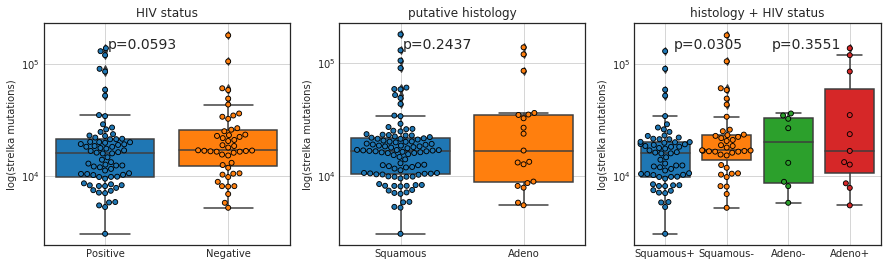

In [115]:

# gene = 'SF3B1'
# boxplot overlaps individual data point
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,9))

    gs = gridspec.GridSpec(int(len(group_cols)/3.0)+1, 3)
    p_values = {}
    for k, col in enumerate(group_cols):
#         titles = group_cols[k]
        group_col = col
        categories = sorted(df[group_col].unique().tolist(), reverse=True) 
#         print(k, col)
        ax = fig.add_subplot(gs[k])
        _ = ax.set_yscale("log")
       
        _ = sns.swarmplot(x=group_col, y=value_col, data=df, edgecolor="black", linewidth=.9)
        _ = sns.boxplot(x=group_col, y=value_col, data=df, saturation=1, ax=ax)

        grps = {}
        # overlay actuall data point
        for i, cat in enumerate(categories):
            grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[value_col]

        if len(categories) == 2:
            # statistical test for 1st grp
            sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
            p = round(p, 4)
            _ = ax.text(0.4 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
        elif len(categories) == 4:
            # statistical test for 1st grp
            for i in [0, 2]:
                sts, p = ss.mannwhitneyu(grps[i], grps[i+1], use_continuity=True, alternative=None)
                p = round(p, 4)
                _ = ax.text(0.3 + i*.2 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
            
#         ax.tick_params(axis='x', labelsize=18) #specify x tick label size
#         _ = ax.set_xticks(range(position+1))
#         _ = ax.set_xticklabels(categories, rotation=0)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=12)
#         _ = ax.set_xlim(xmin=-0.5)
#         _= ax.set_ylabel('spicing events', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('log(strelka mutations)')
        ax.grid(True)

#     plt.suptitle('', fontsize=14)       
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load.png'
#     plt.savefig(of, dpi=200, box_inches='tight')
plt.show()
plt.close()

In [144]:
HIV_pos = df.query('HIV_status == "Positive"').index.tolist()
HIV_pos[:10]
HIV_neg = df.query('HIV_status == "Negative"').index.tolist()
HIV_neg[:10]

['HTMCP-03-06-02001',
 'HTMCP-03-06-02003',
 'HTMCP-03-06-02020',
 'HTMCP-03-06-02054',
 'HTMCP-03-06-02057',
 'HTMCP-03-06-02058',
 'HTMCP-03-06-02109',
 'HTMCP-03-06-02070',
 'HTMCP-03-06-02071',
 'HTMCP-03-06-02076']

['HTMCP-03-06-02002',
 'HTMCP-03-06-02006',
 'HTMCP-03-06-02007',
 'HTMCP-03-06-02008',
 'HTMCP-03-06-02012',
 'HTMCP-03-06-02013',
 'HTMCP-03-06-02026',
 'HTMCP-03-06-02036',
 'HTMCP-03-06-02037',
 'HTMCP-03-06-02040']

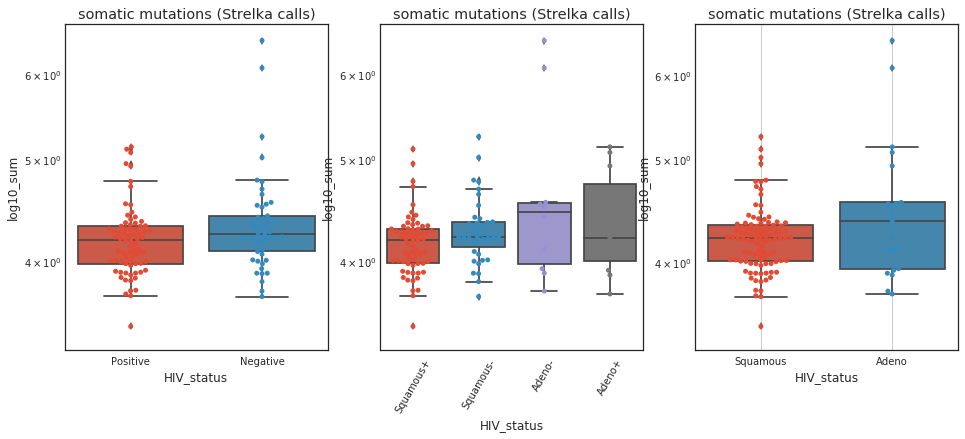

In [12]:
# boxplot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(16,6))
    
    x1 = 'reanne_HIV_status'
    x2 = 'combo'
    x3 = 'reanne_Putative_histology'
    y = 'log10_sum'
    ax1 = plt.subplot(131)
    ax1.set_yscale("log")
    sns.swarmplot(x1, y, data=df)
    sns.boxplot(x1, y, data=df)
    ax1.set_title("somatic mutations (Strelka calls)")
    ax1.set(xlabel='HIV_status')
    
    ax2 = plt.subplot(132)
    ax2.set_yscale("log")
    sns.swarmplot(x2, y, data=df)
    sns.boxplot(x2, y, data=df)
    plt.xticks(rotation=60)
    ax2.set(xlabel='HIV_status')
    ax2.set_title("somatic mutations (Strelka calls)")
    
    ax3 = plt.subplot(133)
    ax3.set_yscale("log")
    sns.swarmplot(x3, y, data=df)
    sns.boxplot(x3, y, data=df)
    ax3.set(xlabel='HIV_status')
    ax3.set_title("somatic mutations (Strelka calls)")
    ax3.grid(True)
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutations_load_HIV_plots.png'    
#     plt.savefig(of)
    plt.show()
    plt.close()

# below are outdated

0 0 is 0.1039964486558819
0 1 is 0.248274809376615


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


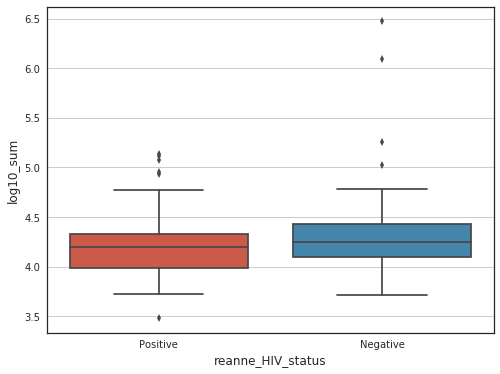

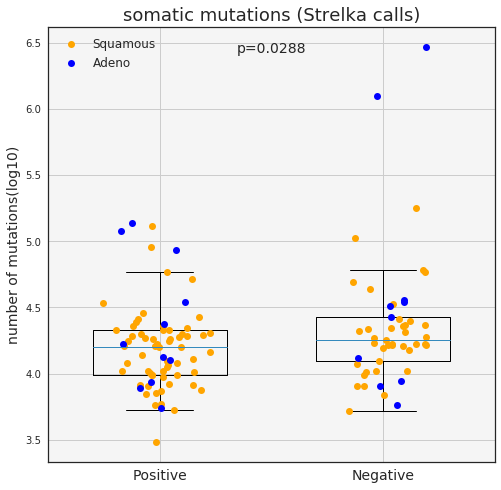

In [37]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.boxplot('reanne_HIV_status', 'log10_sum', data=df)

    value_cols = ['log10_sum']
    titles = ['somatic mutations (Strelka calls)']
    # boxplot overlaps individual data point
    fig, axes = plt.subplots(1, 1, figsize=(8, 8))

    # axes = axes.ravel()
    # group_col = 'combo'
    group_col = 'reanne_HIV_status'
    tissue_col = 'reanne_Putative_histology'
    categories = sorted(df[group_col].unique().tolist(), reverse=True) 
    tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
    p_values = {}
    for k, col in enumerate(value_cols):
    #     ax = axes[k]
        ax=axes
        value_col = col
        for position, cat in enumerate(categories):
            _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                       positions=[position], widths=(0.6), showfliers=False
                      )

        np.random.seed(0)
        grps = {}
        # overlay actuall data point based on tissue types
        for i, cat in enumerate(categories):
            # add jitter and specify maker facecolor and edgecolor               
            for j, tissue in enumerate(tissues):
                y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
                x = np.random.normal(i, 0.1, size=len(y))
        #         ax.scatter(x, y, s=30)
                lb = '' if i == 0 else tissue
                _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                               mec='k', ms=7, marker="o", linestyle="None", label=lb)
                grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
    #         show the unequal variance of each group, not equal
            print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
        # statistical test for 1st grp
        stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    #     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
        p_U = round(p_U, 4)
    #     p_T = round(p_T, 4)
        _ = ax.text(0.5, 0.95,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 
    #     _ = ax.text(0.3, 0.90,'p_Ttest={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

        _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
        _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
        _ = ax.set_xticks(range(position+1))
        _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
    #     ax.set_title(col)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
        _ = ax.set_xlim(xmin=-0.5)
        _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
        ax.grid(True)
        _ = ax.legend(scatterpoints=1,
                  loc='upper left',
                  ncol=1,
                  fontsize=12)
    plt.suptitle('', fontsize=14)  
    of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_1.png'
    # plt.savefig(of1, dpi=200)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


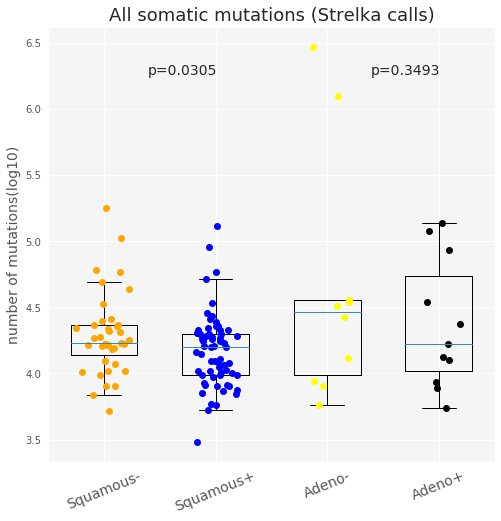

In [38]:

# separate into squamous and adeno, test HIV status difference.
value_cols = ['log10_sum']
titles = ['All somatic mutations (Strelka calls)']
# boxplot overlaps individual data point
fig, axes = plt.subplots(1,1, figsize=(8, 8))
# axes = axes.ravel()
group_col = 'combo'
# group_col = 'HIV_status'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  );

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df[value_col][df[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
#         ax.scatter(x, y, s=30)
        _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][i], mec='k', ms=7, marker="o", linestyle="None")
        grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

    # statistical test for 1st grp
    stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.3, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
    
    # statistical test fro 2nd grp
    stats, p = ss.mannwhitneyu(grps[2], grps[3], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.8, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)    
    
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=18) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=22, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
    ax.grid(True)

plt.suptitle('', fontsize=14)       

of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_2.png'
# plt.savefig(of1, dpi=200)

look at immune related mutations

In [29]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/immune_related_mutations.txt'
df = pd.read_csv(f, header=None, sep='\t')
df = df[[0,5]]
df['patient'] = df[5].apply(lambda x: x.replace('_malignant', ''))
df = df.drop(5, axis=1)
df.columns = ['gene', 'patient']
df.head(2)

,gene,patient
0,A2M,HTMCP-03-06-02396
1,A2M,HTMCP-03-06-02042


In [30]:
df = pd.DataFrame(df.groupby('patient').count()).drop(['HTMCP-03-06-02007', 'HTMCP-03-06-02026']).reset_index()

In [31]:
f = '/home/szong/projects/META_2018/Master_Sample_table_14X292_Feb27_2018_sz.xls'
meta = pd.read_excel(f, sheetname='HTMCP CaCx epi')
meta = meta[['Biospecimen ID', 'HIV status']]
meta['patient'] = meta['Biospecimen ID'].apply(lambda x: '-'.join(['HTMCP-03-06', x.split('-')[3]]))
meta = meta.drop('Biospecimen ID', axis=1)
meta.head(2)

,HIV status,patient
0,negative,HTMCP-03-06-02007
1,negative,HTMCP-03-06-02026


In [32]:
dfm = pd.merge(df, meta, left_on='patient', right_on='patient')
dfm.head()

,patient,gene,HIV status
0,HTMCP-03-06-02001,9,positive
1,HTMCP-03-06-02002,6,negative
2,HTMCP-03-06-02006,6,negative
3,HTMCP-03-06-02012,18,negative
4,HTMCP-03-06-02020,1,positive


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


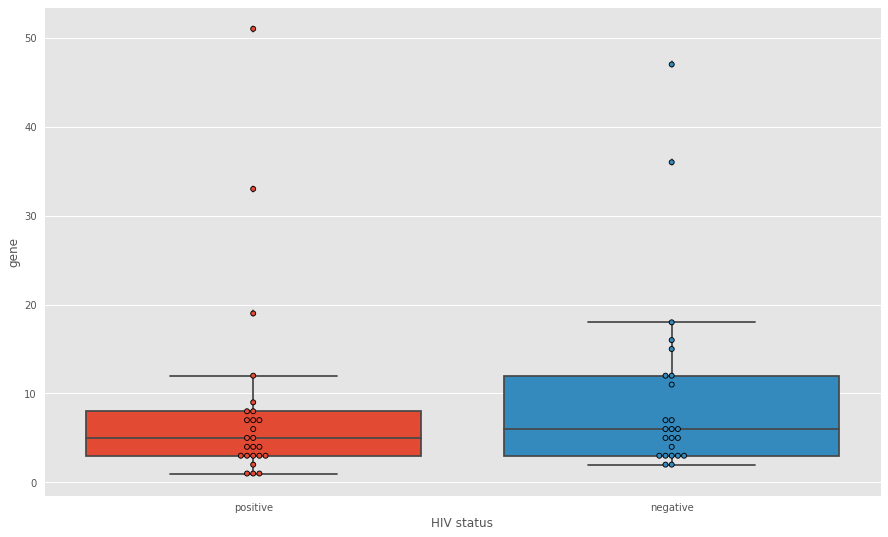

In [38]:
group_col = 'HIV status'
value_col = 'gene'
fig = plt.figure(facecolor='w', figsize=(15,9))
ax = fig.add_subplot(111)
_ = sns.swarmplot(x=group_col, y=value_col, data=dfm, edgecolor="black", linewidth=.9)
_ = sns.boxplot(x=group_col, y=value_col, data=dfm, saturation=1, ax=ax)


In [33]:
dfm.groupby('HIV status')[['gene']].sum()

,gene
HIV status,
negative,237
positive,209


# comparing mutation frequency htmcp vs tcga for genes highlighted either in tcga or akin's landscape paper

,gene,bb,tcga_freq,cc,htmcp_freq,htmcp_minus_tcga,xtext,ytext
0,EP300,21.0,0.108247,10.0,0.081301,-0.026947,0.34,0.28
1,PTEN,16.0,0.082474,7.0,0.056911,-0.025564,0.32,0.19


(0, 0.4)

(0, 0.4)

Text(0.5,0,'Mutation frequency in TCGA')

Text(0,0.5,'Mutation frequency in HTMCP')

CPU times: user 711 ms, sys: 10 ms, total: 721 ms
Wall time: 727 ms


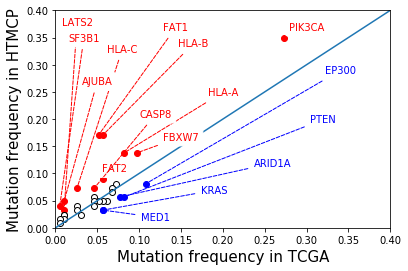

In [5]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/genes_highlighted_in_gcga_landscape_paper_xytext.txt'
df22 = pd.read_csv(f, sep='\t')
# df22.columns = ['gene', 'bb','tcga_freq', 'cc','htmcp_freq', 'htmcp_minus_tcga', 'xtext', 'ytext']
df22.head(2)

df22 = df22.sort_values(['tcga_freq', 'htmcp_freq'], ascending=False)


i = 0
a = 0
# genes = []
for ix, row in df22.iterrows():
    x = row.tcga_freq
    y = row.htmcp_freq
    t = row.gene
    d = row.htmcp_minus_tcga
    xtext = row.xtext
    ytext = row.ytext
    gene = row.gene
#     print(x, y)
 
    if x < y and d > 0.02:
        _ = plt.scatter(x,y,c='red')
        anno_color = 'red'
        anno_ecolor='white'
        fill_color = 'white'
        _ = plt.annotate('{}'.format(t),
                xy=(x,y), 
                xytext=(xtext, ytext), fontsize=10,
                ha='center', va='bottom', color=anno_color,
                textcoords='data', xycoords="data", 
                bbox=dict(boxstyle='round', 
                          fc=fill_color, 
                          edgecolor=anno_ecolor,
                          alpha=1, pad=.4),
                arrowprops=dict(arrowstyle='-', ls='dashed',
                                color=anno_color,
                                shrinkB=0, 
                                connectionstyle='arc3,rad=0.0' 
                              ))
#         i+=.01
#         genes.append([gene, '{0:.3f}'.format(x), '{0:.3f}'.format(y+i)])
        
    elif x >= y and d < -0.02:
        _ = plt.scatter(x,y,c='blue')
        anno_color = 'blue'
        anno_ecolor='white'
        fill_color = 'white'
        _ = plt.annotate('{}'.format(t),
                xy=(x,y), 
                xytext=(xtext, ytext), fontsize=10,
                ha='center', va='bottom', color=anno_color,
                textcoords='data', xycoords="data", 
                bbox=dict(boxstyle='round', 
                          fc=fill_color, 
                          edgecolor=anno_ecolor,
                          alpha=1, pad=.4),
                arrowprops=dict(arrowstyle='-', ls='dashed',
                                color=anno_color,
                                shrinkB=0, 
                                connectionstyle='arc3,rad=0.0' 
                              ))
    elif d <= 0.02 and d >= -0.02:
        _ = plt.scatter(x,y, facecolor='white', edgecolor='black')
#         a+=.01
#         genes.append([gene, '{0:.3f}'.format(x+3*a), '{0:.3f}'.format(y)])
# plt.scatter(df22['tcga_freq'], df22['htmcp_freq'])
plt.plot((0,.4), (0,.4))
plt.xlim(0, .4)
plt.ylim(0,.4)
plt.xlabel('Mutation frequency in TCGA', fontsize=15)
plt.ylabel('Mutation frequency in HTMCP', fontsize=15)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_comparison_htmcp_tcga_highlighted_genes_only.png'

%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()

In [584]:
df22[df22['htmcp_minus_tcga'] >0.02].sort_values('htmcp_freq')

,gene,bb,tcga_freq,cc,htmcp_freq,htmcp_minus_tcga,xtext,ytext
22,LATS2,2.0,0.010309,4.0,0.032520,0.022211,0.010,0.193
25,SF3B1,1.0,0.005155,5.0,0.040650,0.035496,0.005,0.241
26,AJUBA,2.0,0.010309,6.0,0.048780,0.038471,0.010,0.199
23,CASP8,9.0,0.046392,9.0,0.073171,0.026779,0.046,0.163
28,HLA-C,5.0,0.025773,9.0,0.073171,0.047398,0.026,0.193
24,FAT2,11.0,0.056701,11.0,0.089431,0.032730,0.057,0.159
27,FBXW7,19.0,0.097938,17.0,0.138211,0.040273,0.098,0.158
29,HLA-A,16.0,0.082474,17.0,0.138211,0.055737,0.082,0.168
31,HLA-B,11.0,0.056701,21.0,0.170732,0.114031,0.057,0.231
32,FAT1,10.0,0.051546,21.0,0.170732,0.119185,0.052,0.251


In [7]:
# df22

In [502]:
df2 = pd.DataFrame(genes)
df2.columns = ['gene', 'xtext', 'ytest']
df2.head(2)

,gene,xtext,ytest
0,PIK3CA,0.273,0.360
1,EP300,0.138,0.081


In [509]:
df3 = pd.merge(df22, df2, left_on='gene', right_on='gene')

In [512]:
df3 = df3.sort_values('htmcp_minus_tcga')

In [513]:
df3.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/genes_highlighted_in_gcga_landscape_paper_xytext.txt', sep='\t', index=False)
           

In [515]:
df3

,gene,bb,tcga_freq,cc,htmcp_freq,htmcp_minus_tcga,xtext,ytest
1,EP300,21.0,0.108247,10.0,0.081301,-0.026947,0.138,0.081
4,PTEN,16.0,0.082474,7.0,0.056911,-0.025564,0.142,0.057
14,KRAS,11.0,0.056701,4.0,0.032520,-0.024181,0.297,0.033
13,MED1,11.0,0.056701,4.0,0.032520,-0.024181,0.267,0.033
5,ARID1A,15.0,0.077320,7.0,0.056911,-0.020409,0.167,0.057
9,NFE2L2,12.0,0.061856,6.0,0.048780,-0.013075,0.212,0.049
12,ERBB3,11.0,0.056701,6.0,0.048780,-0.007921,0.237,0.049
21,ELF3,6.0,0.030928,3.0,0.024390,-0.006538,0.361,0.024
20,LATS1,9.0,0.046392,5.0,0.040650,-0.005741,0.346,0.041
16,ERBB2,10.0,0.051546,6.0,0.048780,-0.002766,0.322,0.049


# make a plot comparing gene mutation frequency between TCGA and NCI, percentage of patients carry mutations for each gene

In [8]:
f0 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_validation_target_candidates_20190309_added.xls'
df0 = pd.read_excel(f0, sheet_name='proposed_genes')
df0.head()
df0.shape

,gene,number_HTMCP_patients_with_mutation,reason_picked_for_capture,suggest_exclude,average_RPKM
0,MUC4,87,mutated_in_3_or_more_HTMCP_patient,YES,19.873095
1,TTN,49,mutated_in_3_or_more_HTMCP_patient,YES,0.010591
2,AHNAK2,43,mutated_in_3_or_more_HTMCP_patient,YES,20.152050
3,PIK3CA,41,tcga_and_landscape_significantly_mutated,NaN,4.438437
4,AC007731.1,33,mutated_in_3_or_more_HTMCP_patient,YES,0.000377


(2840, 5)

In [15]:
df0.describe()

,number_HTMCP_patients_with_mutation,average_RPKM
count,2840.000000,2840.000000
mean,4.046831,30.369727
std,3.303311,362.022053
min,1.000000,0.000000
25%,3.000000,0.538399
50%,3.000000,3.896594
75%,4.000000,10.780410
max,87.000000,11064.021661


In [16]:
# df0.query('suggest_exclude == "YES"')

In [17]:
# df0 = df0.query('suggest_exclude != "YES"')
df0.head()

,gene,number_HTMCP_patients_with_mutation,reason_picked_for_capture,suggest_exclude,average_RPKM
0,MUC4,87,mutated_in_3_or_more_HTMCP_patient,YES,19.873095
1,TTN,49,mutated_in_3_or_more_HTMCP_patient,YES,0.010591
2,AHNAK2,43,mutated_in_3_or_more_HTMCP_patient,YES,20.152050
3,PIK3CA,41,tcga_and_landscape_significantly_mutated,NaN,4.438437
4,AC007731.1,33,mutated_in_3_or_more_HTMCP_patient,YES,0.000377


In [18]:
df0.shape


(2840, 5)

In [9]:
validation_genes = df0.gene
# validation_genes

# TCGA mutations

In [32]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_variants/tcga.genome.wustl.edu_CESC.IlluminaGA_DNASeq_curated.Level_2.1.0.0.somatic.maf'
df1 = pd.read_csv(f1, sep='\t')
df1.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gene_name_source,gene_name_source.1,tumor_ref_reads,tumor_var_reads,tumor_vaf,normal_ref_reads,normal_var_reads,normal_vaf,dbSNP_rsID,GMAF
0,A1BG,1,genome.wustl.edu,37,19,58864353,58864353,+,Missense_Mutation,SNP,...,HGNC,ENSG00000121410,93,80,46.24,170,0,0.0,NaN,NaN
1,A1BG-AS1,503538,genome.wustl.edu,37,19,58864179,58864179,+,RNA,SNP,...,HGNC,ENSG00000268895,81,12,12.90,30,0,0.0,NaN,NaN
2,A1CF,29974,genome.wustl.edu,37,10,52587925,52587925,+,Missense_Mutation,SNP,...,HGNC,ENSG00000148584,19,10,34.48,34,0,0.0,NaN,NaN
3,A1CF,29974,genome.wustl.edu,37,10,52601652,52601652,+,Missense_Mutation,SNP,...,HGNC,ENSG00000148584,29,29,50.00,36,0,0.0,NaN,NaN
4,A2M,2,genome.wustl.edu,37,12,9262517,9262517,+,Missense_Mutation,SNP,...,HGNC,ENSG00000175899,113,55,32.74,95,0,0.0,NaN,NaN


In [33]:
df1.gene_name.nunique()
df1.shape

16453

(46547, 66)

In [35]:
types = df1.Variant_Classification.unique()

In [37]:
#not related
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsigcv/mafs/combined.snvs.indels_123_patients.txt'
dfx = pd.read_csv(f, sep='\t')
dfx.head(2)

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,40,43,68,71,72,83,84,85,86,87,88,90,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

In [ ]:
# all types
# 3'Flank
# 3'UTR
# 5'Flank
# 5'UTR
# Frame_Shift_Del
# Frame_Shift_Ins
# IGR
# In_Frame_Del
# In_Frame_Ins
# Intron
# Missense_Mutation
# Nonsense_Mutation
# Nonstop_Mutation
# RNA
# Silent
# Splice_Site
# Translation_Start_Site


In [13]:
df1.shape

(46547, 66)

In [14]:
df1 = df1.query('Variant_Classification!="Silent"')

In [15]:
df1.shape

(36782, 66)

In [17]:
tcga_genes = df1.gene_name.unique()

In [391]:
# first 3 are patient id.
df1['patient'] = df1['Tumor_Sample_Barcode'].apply(lambda x: '_'.join(x.split('-')[:3]))

In [392]:
df1 = df1[['gene_name', 'patient']]

In [393]:
df1.head(2)

,gene_name,patient
0,A1BG,TCGA_BI_A0VS
1,A1BG-AS1,TCGA_EK_A3GM


In [18]:
def unique(a):
    """ return the list with duplicate elements removed """
    return list(set(a))

def intersect(a, b):
    """ return the intersection of two lists """
    return list(set(a) & set(b))

def union(a, b):
    """ return the union of two lists """
    return list(set(a) | set(b))

def exclusive(a, b):
    """ return items either exclusive in a or b """
    return list(set(a) ^ set(b))

def unique2a(a, b):
    """ return items only in a, but not in b """
    return list(set(a) & set(set(a) ^ set(b)))

def write(lst, of):
    with open(of, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        for val in lst:
            writer.writerow([val]) 

In [20]:
len(intersect(validation_genes, tcga_genes))

2424

In [29]:
len(intersect(validation_genes, htmcp_genes))

2840

In [30]:
len(intersect(tcga_genes, htmcp_genes))

10138

# map ensg id to gene name

In [394]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/ensg_in_tcga_map_to_gene_names.txt'
df33 = pd.read_csv(f, sep='\t', header=None)
df33.columns = ['id', 'name']
df33.head(2)

,id,name
0,ENSG00000105642,KCNN1
1,ENSG00000141854,CTB-55O6.8


In [395]:
gene_dict = dict(zip(df33['id'], df33['name']))

In [396]:
df1['gene'] = df1.gene_name.replace(gene_dict)

In [397]:
# df1['gene'] = df1.gene_name.map(gene_dict, na_action='ignore')

In [398]:
# df1.query('gene == "RP11-30J20.1"')

In [399]:
df1.shape

(36782, 3)

In [400]:
df2 = pd.DataFrame(df1.groupby('gene')['patient'].nunique())

In [401]:
df2.head()
df2.shape

,patient
gene,
7SK,3
A1BG,1
A1BG-AS1,1
A1CF,2
A2M,2


(14968, 1)

In [402]:
df1.patient.nunique()

194

In [403]:
df2['freq'] = df2/df1.patient.nunique()

In [404]:
df2.sort_values('freq', ascending=False).head(2)

,patient,freq
gene,,
TTN,68,0.350515
PIK3CA,53,0.273196


In [405]:
df2.shape

(14968, 2)

In [406]:
df_tcga = df2.copy()

In [285]:
df_tcga.loc['PIK3CA',]

patient    53.000000
freq        0.273196
Name: PIK3CA, dtype: float64

# NCI mutations

In [21]:
# snv summary file
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/HIGH_MODERATE_SNV_summary_with_normal_with_AF_filtered_somatic.tsv'
df1 = pd.read_csv(f, sep='\t', usecols=['gene', 'patient_ID'])
df1.head(2)

,gene,patient_ID
0,SAMD11,HTMCP-03-06-02007
1,SAMD11,HTMCP-03-06-02214


In [22]:
# indel summary file
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/HIGH_MODERATE_INDEL_summary_with_normal_strelka_indels_only.tsv'
df2 = pd.read_csv(f, sep='\t', usecols=['gene', 'patient_ID'])
df2.head(2)

,gene,patient_ID
0,PCNT,HTMCP-03-06-02448
1,MLL3,HTMCP-03-06-02097


In [23]:
dfc = pd.concat([df1, df2])
dfc['patient'] = dfc.patient_ID.str.replace('_malignant', '')
dfc.drop('patient_ID', inplace=True, axis=1)

In [24]:
dfd = dfc[~dfc.patient.isin(['HTMCP-03-06-02061'])].drop_duplicates()

In [25]:
dfd.shape

(34547, 2)

In [26]:
dfd.head()

,gene,patient
0,SAMD11,HTMCP-03-06-02007
1,SAMD11,HTMCP-03-06-02214
2,KLHL17,HTMCP-03-06-02120
3,PLEKHN1,HTMCP-03-06-02335
4,PLEKHN1,HTMCP-03-06-02020


In [28]:
htmcp_genes = dfd.gene.unique()

In [292]:
dfd['HIV'] = dfd.patient.apply(lambda x:'Positive' if x in HIV_pos else 'Negative')

In [238]:
dfd.head()

,gene,patient,HIV
0,SAMD11,HTMCP-03-06-02007,Negative
1,SAMD11,HTMCP-03-06-02214,Negative
2,KLHL17,HTMCP-03-06-02120,Positive
3,PLEKHN1,HTMCP-03-06-02335,Positive
4,PLEKHN1,HTMCP-03-06-02020,Positive


In [239]:
dfg = dfd.groupby(['gene', 'HIV'])['patient'].nunique().unstack().fillna(0)
dfg.head(2)

HIV,Negative,Positive
gene,,
A1BG,0.0,1.0
A1CF,0.0,2.0


In [240]:
dfg['pos_freq'] = dfg.Positive/len(HIV_pos)
dfg['neg_freq'] = dfg.Negative/len(HIV_neg)

In [241]:
dfg.head()

HIV,Negative,Positive,pos_freq,neg_freq
gene,,,,
A1BG,0.0,1.0,0.013514,0.000000
A1CF,0.0,2.0,0.027027,0.000000
A2LD1,1.0,0.0,0.000000,0.020408
A2M,5.0,2.0,0.027027,0.102041
A2ML1,2.0,1.0,0.013514,0.040816


In [242]:
dfg['diff'] =  dfg.pos_freq - dfg.neg_freq 
dfg['freq_max'] = dfg[['pos_freq', "neg_freq"]].max(axis=1)
dfg['diff_pct'] =  dfg['diff']/dfg['freq_max']
dfg = dfg[dfg['diff'] <0.3] #remove MUC4 and AHNAK2, likely false positives
dfg = dfg.sort_values(['diff',  'diff_pct', 'pos_freq', 'neg_freq'], ascending=[False, False, False, False]).reset_index()

In [244]:
dfg.head()
dfg.shape
dfg.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_comparison_pos_vs_neg.txt', index=False, sep='\t')

HIV,gene,Negative,Positive,pos_freq,neg_freq,diff,freq_max,diff_pct
0,AHNAK2,14.0,31.0,0.418919,0.285714,0.133205,0.418919,0.317972
1,MUC2,3.0,13.0,0.175676,0.061224,0.114451,0.175676,0.651491
2,FAM83H,0.0,7.0,0.094595,0.000000,0.094595,0.094595,1.000000
3,FMN2,5.0,14.0,0.189189,0.102041,0.087148,0.189189,0.460641
4,DGKZ,0.0,6.0,0.081081,0.000000,0.081081,0.081081,1.000000


(14585, 8)

In [225]:
dfg = dfg.loc[dfg.gene.isin(validation_genes)].reset_index(drop=True)

In [226]:
dfg.index

RangeIndex(start=0, stop=2840, step=1)

CPU times: user 1.41 s, sys: 76 ms, total: 1.49 s
Wall time: 1.77 s


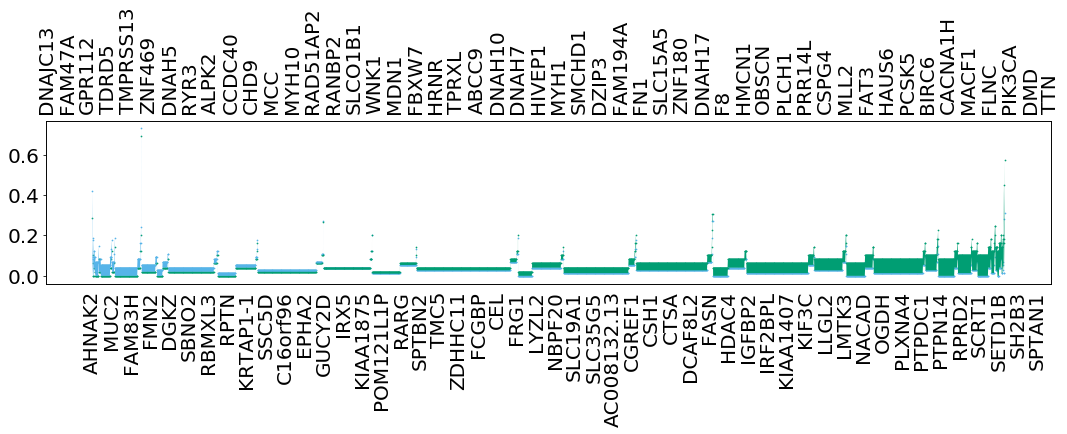

In [227]:
fig, ax1 = plt.subplots(1, 1, sharex=False, figsize=(18,3), facecolor='white')
ax3 = ax1.twiny()
x = dfg.index 
y1 = dfg.pos_freq
y2 = dfg.neg_freq
clr_pos = "#56B4E9"
clr_neg = "#009E73"
_ = ax1.scatter(x, y1, c=clr_pos,s=.5)
_ = ax1.scatter(x, y2, c=clr_neg,s=.5)
_ = ax1.fill_between(x, y1, y2, where=y1 >= y2, facecolor=clr_pos, interpolate=True)
_ = ax1.fill_between(x, y1, y2, where=y1 <= y2, facecolor=clr_neg, interpolate=True)
_ = ax1.set_xticks(np.arange(1, 3000, 60))
_ = ax1.set_xticklabels(dfg['gene'].head(50), rotation=90, fontsize=20)
_ = plt.setp(ax1.get_xticklines(),visible=False)
_ = ax1.set_yticklabels(["{:.1f}".format(i) for i in ax1.get_yticks()], fontsize=20)

_ = ax3.set_xticks(np.arange(1, 3000, 60))
_ = ax3.set_xticklabels(dfg['gene'].tail(50), rotation=90, fontsize=20)
# _ = ax3.set_xlabel('genes (pos_freq < neg_freq)')
_ = plt.setp(ax3.get_xticklines(),visible=False)
# x = dfg_val.index 
# y1 = dfg_val.pos_freq
# y2 = dfg_val.neg_freq
# _ = ax2.scatter(x, y1, c='clr_pos',s=.5)
# _ = ax2.scatter(x, y2, c='clr_neg',s=.5)
# _ = ax2.fill_between(x, y1, y2, where=y1 >= y2, facecolor='clr_pos', interpolate=True)
# _ = ax2.fill_between(x, y1, y2, where=y1 <= y2, facecolor='clr_neg', interpolate=True)
# plt.subplots_adjust(hspace=.7)

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_comparison_pos_vs_neg_validation_genes.png'
%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()

In [229]:
dfd.gene.nunique()
dfd.shape

14585

(34547, 3)

In [127]:
assert dfm[dfm.nci_freq==0].shape[0] + dfm[dfm.tcga_freq==0].shape[0] + 10138 == 19453

In [349]:
dfm[dfm.nci_freq!=0][dfm.nci_freq<=0.01].shape[0]
dfm[dfm.tcga_freq!=0][dfm.tcga_freq<=0.01].shape[0]

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5960

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


6868

In [298]:
dfe = dfd.groupby(['gene', 'patient'])['patient'].nunique().unstack().fillna(0)

In [299]:
dfe.head(2)

patient,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447,HTMCP-03-06-02448
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/variant_summary_table.txt'

dfe.to_csv(of)

In [65]:
dfe[dfe >0].loc['ERBB2', :].dropna()

patient
HTMCP-03-06-02026    1.0
HTMCP-03-06-02058    1.0
HTMCP-03-06-02110    1.0
HTMCP-03-06-02139    1.0
HTMCP-03-06-02203    1.0
HTMCP-03-06-02396    1.0
Name: ERBB2, dtype: float64

In [60]:
# pd.pivot_table(dfd, index=['gene'], aggfunc='count')

In [412]:
dfe = pd.DataFrame(dfd.groupby('gene')['patient'].nunique())
dfe.head(2)

,patient
gene,
A1BG,1
A1CF,2


In [413]:
dfd.patient.nunique()

123

In [414]:
dfe['freq'] = dfe/dfd.patient.nunique()

In [415]:
dfe.head()

,patient,freq
gene,,
A1BG,1,0.008130
A1CF,2,0.016260
A2LD1,1,0.008130
A2M,7,0.056911
A2ML1,3,0.024390


In [416]:
dfe.shape

(14585, 2)

In [417]:
df_nci = dfe.copy()

In [307]:
df_tcga.head(2)

,patient,freq
gene,,
7SK,3,0.015464
A1BG,1,0.005155


In [72]:
df_tcga.shape

(15006, 2)

In [68]:
df_nci.head(2)

,patient,freq
gene,,
A1BG,1,0.00813
A1CF,2,0.01626


In [418]:
dfm = pd.merge(df_tcga, df_nci, left_index=True, right_index=True, how='outer')

In [419]:
dfm.columns = ['tcga_patient', 'tcga_freq', 'nci_patient', 'nci_freq']

In [426]:
dfm.head()
dfm.shape

,tcga_patient,tcga_freq,nci_patient,nci_freq
gene,,,,
7SK,3.0,0.015464,0.0,0.00000
A1BG,1.0,0.005155,1.0,0.00813
A1BG-AS1,1.0,0.005155,0.0,0.00000
A1CF,2.0,0.010309,2.0,0.01626
A2LD1,0.0,0.000000,1.0,0.00813


(19348, 4)

In [422]:
dfm = dfm.fillna(0)

In [425]:
dfm.to_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/gene_mutate_freqency_tcga_vs_nci_cohort.csv', sep='\t')

# to plot just start from here

In [370]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/gene_mutate_freqency_tcga_vs_nci_cohort.csv'
# dfm.to_csv(of, sep='\t', index=Fasle)
dfm = pd.read_csv(of, sep='\t')

In [371]:
dfm.head(5)
dfm.shape

,gene,tcga_patient,tcga_freq,nci_patient,nci_freq
0,7SK,3.0,0.015464,NaN,NaN
1,A1BG,1.0,0.005155,1.0,0.00813
2,A1BG-AS1,1.0,0.005155,NaN,NaN
3,A1CF,2.0,0.010309,2.0,0.01626
4,A2LD1,NaN,NaN,1.0,0.00813


(19348, 5)

In [372]:
dfm[(dfm.tcga_freq!=0)&(dfm.nci_freq==0)].shape

(0, 5)

In [373]:
df_tcga.head()

,patient,freq
gene,,
7SK,3,0.015464
A1BG,1,0.005155
A1BG-AS1,1,0.005155
A1CF,2,0.010309
A2M,2,0.010309


In [374]:
dfn = dfm.dropna()

In [375]:
dfn = dfn[(dfn.tcga_freq>=0.01)&(dfn.nci_freq>=0.01)]

In [376]:
dfn.head()
dfn.shape

,gene,tcga_patient,tcga_freq,nci_patient,nci_freq
3,A1CF,2.0,0.010309,2.0,0.016260
5,A2M,2.0,0.010309,7.0,0.056911
10,AACS,2.0,0.010309,2.0,0.016260
13,AADACL2,2.0,0.010309,3.0,0.024390
19,AAK1,4.0,0.020619,5.0,0.040650


(4624, 5)

In [377]:
# dfn.columns = ['tcga_freq', 'nci_freq']
dfn['diff'] =  dfn.nci_freq - dfn.tcga_freq 
dfn['freq_max'] = dfn[['nci_freq', "tcga_freq"]].max(axis=1)
dfn['diff_pct'] =  dfn['diff']/dfn['freq_max']
dfn = dfn[dfn['diff'] <0.3] #remove MUC4 and AHNAK2, likely false positives
dfk = dfn.sort_values([ 'diff', 'diff_pct', 'nci_freq', 'tcga_freq'], ascending=[False, False, False, False]).reset_index()

In [378]:
dfk.shape

(4622, 9)

In [84]:
# dfm.columns = ['tcga_freq', 'nci_freq']
dfm = dfm.fillna(0)
dfm['diff'] =  dfm.nci_freq - dfm.tcga_freq 
dfm['freq_max'] = dfm[['nci_freq', "tcga_freq"]].max(axis=1)
dfm['diff_pct'] =  dfm['diff']/dfm['freq_max']
# dfm = dfm[dfm['diff'] <0.3] #remove MUC4 and AHNAK2, likely false positives
dfl = dfm.sort_values([ 'diff', 'diff_pct', 'nci_freq', 'tcga_freq'], ascending=[False, False, False, False]).reset_index()

In [85]:
dfl.shape
dfl.head(2)

(19453, 9)

,index,gene,tcga_patient,tcga_freq,nci_patient,nci_freq,diff,freq_max,diff_pct
0,11121,MUC4,37.0,0.190722,88.0,0.715447,0.524726,0.715447,0.733423
1,573,AHNAK2,12.0,0.061856,45.0,0.365854,0.303998,0.365854,0.830928


In [79]:
df_val = dfm.loc[dfm.gene.isin(validation_genes)]

df_val.shape
df_val.head(2)
df_val['diff'] =  df_val.nci_freq - df_val.tcga_freq 
df_val['freq_max'] = df_val[['nci_freq', "tcga_freq"]].max(axis=1)
df_val['diff_pct'] =  df_val['diff']/df_val['freq_max']
df_val = df_val[df_val['diff'] <0.3] #remove MUC4 and AHNAK2, likely false positives
dfk_val = df_val.sort_values(['diff',  'diff_pct', 'nci_freq', 'tcga_freq'], ascending=[False, False, False, False]).reset_index()

(2840, 5)

,gene,tcga_patient,tcga_freq,nci_patient,nci_freq
4,A2M,2.0,0.010309,7.0,0.056911
6,A4GALT,NaN,NaN,3.0,0.024390


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [379]:
dfk.head(5)
# dfk.head

,index,gene,tcga_patient,tcga_freq,nci_patient,nci_freq,diff,freq_max,diff_pct
0,6701,GOLGA6L2,3.0,0.015464,28.0,0.227642,0.212178,0.227642,0.932069
1,10400,MUC17,14.0,0.072165,33.0,0.268293,0.196128,0.268293,0.731022
2,9503,MAGEC1,8.0,0.041237,25.0,0.203252,0.162015,0.203252,0.797113
3,6078,FLG2,8.0,0.041237,23.0,0.186992,0.145755,0.186992,0.779471
4,10399,MUC16,28.0,0.144330,35.0,0.284553,0.140223,0.284553,0.492784


In [380]:
dfk.shape

(4622, 9)

In [122]:
df_val = dfm.reindex(validation_genes)

df_val.shape
df_val.head(2)
df_val['diff'] =  df_val.nci_freq - df_val.tcga_freq 
df_val['freq_max'] = df_val[['nci_freq', "tcga_freq"]].max(axis=1)
df_val['diff_pct'] =  df_val['diff']/df_val['freq_max']
df_val = df_val[df_val['diff'] <0.3] #remove MUC4 and AHNAK2, likely false positives
dfk_val = df_val.sort_values(['diff',  'diff_pct', 'nci_freq', 'tcga_freq'], ascending=[False, False, False, False]).reset_index()

In [93]:
dfl.shape
dfl.head(2)
a = dfl.loc[dfl['diff'] >=0,].shape[0]
b = dfl.loc[dfl['diff'] <=0,].shape[0]
a
b
a/(a+b)

(19453, 9)

,index,gene,tcga_patient,tcga_freq,nci_patient,nci_freq,diff,freq_max,diff_pct
0,11121,MUC4,37.0,0.190722,88.0,0.715447,0.524726,0.715447,0.733423
1,573,AHNAK2,12.0,0.061856,45.0,0.365854,0.303998,0.365854,0.830928


12133

7320

0.6237084254356654

CPU times: user 1.63 s, sys: 90 ms, total: 1.72 s
Wall time: 2.28 s


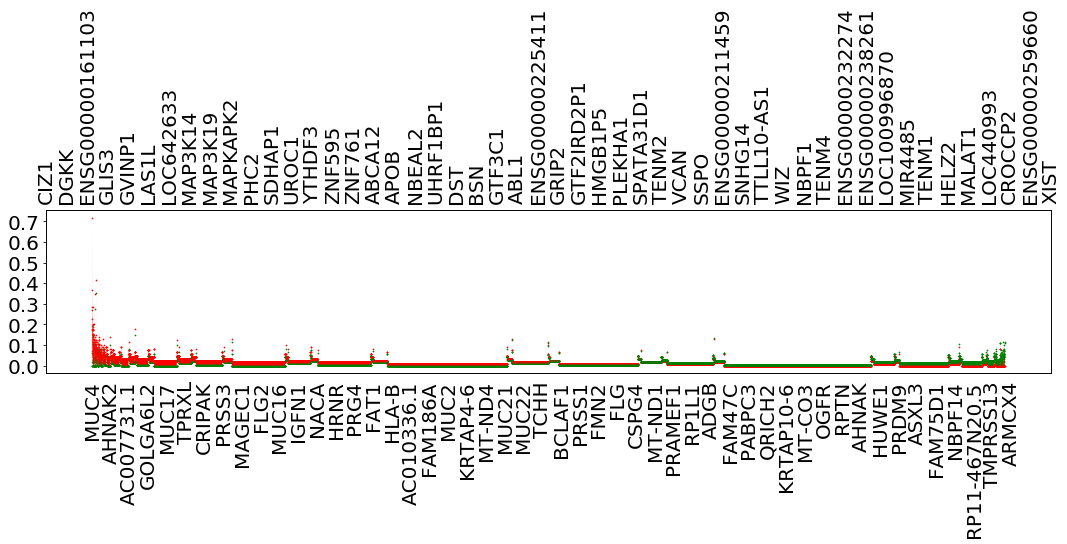

In [116]:
fig, ax1 = plt.subplots(1, 1, sharex=False, figsize=(18,3), facecolor='white')
ax3 = ax1.twiny()
x = dfl.index 
y1 = dfl.nci_freq
y2 = dfl.tcga_freq
_ = ax1.scatter(x, y1, c='red',s=.5)
_ = ax1.scatter(x, y2, c='green',s=.5)
_ = ax1.fill_between(x, y1, y2, where=y1 >= y2, facecolor='red', interpolate=True)
_ = ax1.fill_between(x, y1, y2, where=y1 <= y2, facecolor='green', interpolate=True)
_ = ax1.set_xticks(np.arange(1, 20000, 400))
_ = ax1.set_xticklabels(dfl['gene'].head(50), rotation=90, fontsize=20)
_ = plt.setp(ax1.get_xticklines(),visible=False)
_ = ax1.set_yticklabels(["{:.1f}".format(i) for i in ax1.get_yticks()], fontsize=20)

_ = ax3.set_xticks(np.arange(1, 20000, 400))
_ = ax3.set_xticklabels(dfl['gene'].tail(50), rotation=90, fontsize=20)
# _ = ax3.set_xlabel('genes (nci_freq < tcga_freq)')
_ = plt.setp(ax3.get_xticklines(),visible=False)
# x = dfl_val.index 
# y1 = dfl_val.nci_freq
# y2 = dfl_val.tcga_freq
# _ = ax2.scatter(x, y1, c='red',s=.5)
# _ = ax2.scatter(x, y2, c='green',s=.5)
# _ = ax2.fill_between(x, y1, y2, where=y1 >= y2, facecolor='red', interpolate=True)
# _ = ax2.fill_between(x, y1, y2, where=y1 <= y2, facecolor='green', interpolate=True)
# plt.subplots_adjust(hspace=.7)

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_comparison_nci_vs_tcga_all_genes.png'
%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()

In [383]:
dfk[dfk.gene.isin(validation_genes)].shape

(1856, 9)

CPU times: user 1.06 s, sys: 49 ms, total: 1.11 s
Wall time: 1.17 s


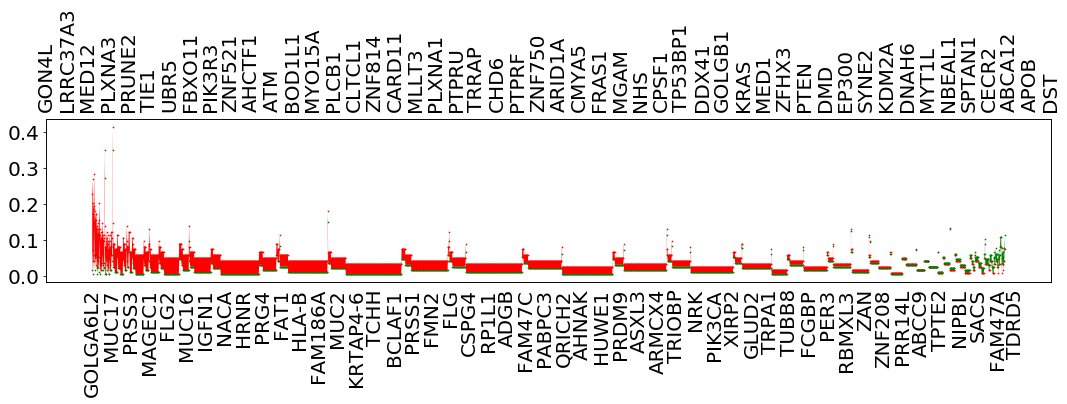

In [80]:
fig, ax1 = plt.subplots(1, 1, sharex=False, figsize=(18,3), facecolor='white')
ax3 = ax1.twiny()
x = dfk_val.index 
y1 = dfk_val.nci_freq
y2 = dfk_val.tcga_freq
_ = ax1.scatter(x, y1, c='red',s=.5)
_ = ax1.scatter(x, y2, c='green',s=.5)
_ = ax1.fill_between(x, y1, y2, where=y1 >= y2, facecolor='red', interpolate=True)
_ = ax1.fill_between(x, y1, y2, where=y1 <= y2, facecolor='green', interpolate=True)
_ = ax1.set_xticks(np.arange(1, 2500, 50))
_ = ax1.set_xticklabels(dfk_val['gene'].head(50), rotation=90, fontsize=20)
_ = plt.setp(ax1.get_xticklines(),visible=False)
_ = ax1.set_yticklabels(["{:.1f}".format(i) for i in ax1.get_yticks()], fontsize=20)

_ = ax3.set_xticks(np.arange(1, 2500, 50))
_ = ax3.set_xticklabels(dfk_val['gene'].tail(50), rotation=90, fontsize=20)
# _ = ax3.set_xlabel('genes (nci_freq < tcga_freq)')
_ = plt.setp(ax3.get_xticklines(),visible=False)


of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/mutation_frequency_comparison_nci_vs_tcga_validation_shared_genes_0.1_2422.png'
%time plt.savefig(of, bbox_inches='tight',dpi=200)
plt.show()

In [78]:
dfk_val.head()

,index,gene,tcga_patient,tcga_freq,nci_patient,nci_freq,diff,freq_max,diff_pct
0,11121,MUC4,37.0,0.190722,88.0,0.715447,0.524726,0.715447,0.733423
1,573,AHNAK2,12.0,0.061856,45.0,0.365854,0.303998,0.365854,0.830928
2,7436,GOLGA6L2,3.0,0.015464,28.0,0.227642,0.212178,0.227642,0.932069
3,11114,MUC17,14.0,0.072165,33.0,0.268293,0.196128,0.268293,0.731022
4,13661,PRSS3,1.0,0.005155,21.0,0.170732,0.165577,0.170732,0.969809


should i dropna? depending on if na means 0% or or the gene is not in the annotation list of genes
dropna almost removed half of the genes, not good, this either means two cohorts are very different or variants were called/annotated very differently

In [66]:
validation_genes[:10]

3     PIK3CA
12     TPRXL
13      HRNR
14    CRIPAK
15      MLL3
16     PRSS3
17      FAT1
18     HLA-B
19      FMN2
20     HLA-A
Name: gene, dtype: object

In [67]:
len(validation_genes)

2751

In [76]:
dfm = dfm[dfm.index.isin(validation_genes)]

In [69]:
# dfm = dfm.dropna()

In [77]:
dfm.shape

(2751, 4)

In [78]:
dfm.head()

,tcga_patient,tcga_freq,nci_patient,nci_freq
A2M,2.0,0.010309,7.0,0.056911
A4GALT,NaN,NaN,3.0,0.024390
AAK1,4.0,0.020619,5.0,0.040650
ABCA1,5.0,0.025773,8.0,0.065041
ABCA12,15.0,0.077320,5.0,0.040650


In [79]:
dfm.dropna().shape

(2384, 4)

In [80]:
dfm = dfm.sort_values(['nci_freq', 'tcga_freq'], ascending=False)

In [81]:
dfm.head()

,tcga_patient,tcga_freq,nci_patient,nci_freq
PIK3CA,53.0,0.273196,43.0,0.349593
MLL3,29.0,0.149485,22.0,0.178862
HRNR,10.0,0.051546,22.0,0.178862
TPRXL,NaN,NaN,22.0,0.178862
HLA-B,11.0,0.056701,21.0,0.170732


In [82]:
labels = dfm.index.tolist()
x = dfm.tcga_freq
y = dfm.nci_freq

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


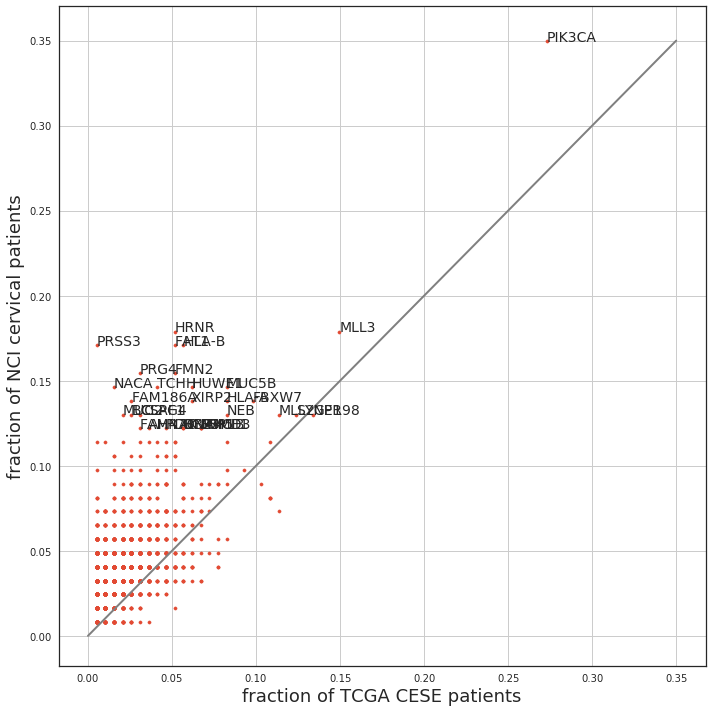

In [83]:

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(10,10))
    ax = fig.add_subplot(111)
#     fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(x, y, s=10)

    ann = []
    n = len(labels)
    for i in range(n):
        xy = [x[i], y[i]]
        fc = x[i]/y[i]
#         if max(xy) >= 0.12 or fc > 3 or fc < 1/3:
        if max(xy) >= 0.12:
            ann.append(ax.annotate(labels[i], xy = (x[i], y[i]), fontsize=14))
    mask = np.zeros(fig.canvas.get_width_height(), bool)
    plt.tight_layout()
    fig.canvas.draw()

    ax.plot([0,.35], [0,.35], linewidth=2, color='gray')
    for a in ann:
        bbox = a.get_window_extent()
        x0 = int(bbox.x0)
        x1 = int(math.ceil(bbox.x1))
        y0 = int(bbox.y0)
        y1 = int(math.ceil(bbox.y1))

        s = np.s_[x0:x1+1, y0:y1+1]
        if np.any(mask[s]):
            a.set_visible(True)
        else:
            mask[s] = True

    plt.xlabel('fraction of TCGA CESE patients', fontsize=18)
    plt.ylabel('fraction of NCI cervical patients', fontsize=18)
    plt.tight_layout()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/tcga_nci_percent_patient_mutated.png'
plt.savefig(of, dpi=300)
plt.show()

In [88]:
# splicesome genes: 145 unique gene names
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/spliceosome/240_spliceosome_genes_with_duplicates.txt'
df = pd.read_csv(f, sep='\t')
df.head(2)

,HGNC ID,Approved Symbol,Approved Name,Status,Previous Symbols,Synonyms,Chromosome,Accession Numbers,RefSeq IDs,Gene Family Tag,Gene family description,Gene family ID
0,17040,CASC3,cancer susceptibility 3,Approved,NaN,"MLN51, BTZ",17q21.1,X80199,NM_007359,NaN,Exon junction complex,1238.0
1,18683,EIF4A3,eukaryotic translation initiation factor 4A3,Approved,DDX48,"KIAA0111, EIF4AIII, Fal1",17q25.3,BC004386,NM_014740,NaN,Exon junction complex,1238.0


In [106]:
df[df['Approved Symbol'] == "SRRM2"]

,HGNC ID,Approved Symbol,Approved Name,Status,Previous Symbols,Synonyms,Chromosome,Accession Numbers,RefSeq IDs,Gene Family Tag,Gene family description,Gene family ID
154,16639,SRRM2,serine/arginine repetitive matrix 2,Approved,NaN,"SRm300, SRL300, KIAA0324, Cwc21",16p13.3,AF201422,NaN,NaN,Spliceosomal C complex,1510.0
207,16639,SRRM2,serine/arginine repetitive matrix 2,Approved,NaN,"SRm300, SRL300, KIAA0324, Cwc21",16p13.3,AF201422,NaN,NaN,Spliceosomal P complex,1516.0


In [89]:
sp_genes = df['Approved Symbol'].unique()

In [90]:
dfm.head(2)

,tcga_patient,tcga_freq,nci_patient,nci_freq
PIK3CA,53.0,0.273196,43.0,0.349593
MLL3,29.0,0.149485,22.0,0.178862


In [101]:
dfm[dfm.index.isin(sp_genes)].sort_values('nci_freq', ascending=False).head()

,tcga_patient,tcga_freq,nci_patient,nci_freq
SRRM2,7.0,0.036082,9.0,0.073171
HNRNPC,1.0,0.005155,6.0,0.048780
CWC22,1.0,0.005155,5.0,0.040650
PPIG,1.0,0.005155,5.0,0.040650
SF3B1,1.0,0.005155,5.0,0.040650


In [93]:
# validation genes
df0.head(2)

,gene,number_HTMCP_patients_with_mutation,reason_picked_for_capture,suggest_exclude,average_RPKM
3,PIK3CA,41,tcga_and_landscape_significantly_mutated,NaN,4.438437
12,TPRXL,22,mutated_in_3_or_more_HTMCP_patient,NaN,2.755383


In [94]:
df0[df0.gene.isin(sp_genes)].shape

(75, 5)

In [17]:
# df_nci[df_nci.index.isin(sp_genes)].sort_values('freq', ascending=False)

In [53]:
f3 = '/projects/mwarren_prj/mwarren_prj_results/VDB-235/CESC.tsv'
df3 = pd.read_csv(f3, sep='\t')
df3.head(2)

,gene_id,percent_mutated
0,?|10431,0.515464
1,?|57714,2.061856


In [54]:
df3['gene'] = df3.gene_id.apply(lambda x: x.split('|')[0])

In [57]:
df3 = df3.drop('gene_id', axis=1)

In [58]:
df3.head(2)

,percent_mutated,gene
0,0.515464,?
1,2.061856,?


In [59]:
df3['tcga_freq'] = df3.percent_mutated/100

In [60]:
df3 = df3.drop('percent_mutated', axis=1)

In [61]:
df3.head(2)

,gene,tcga_freq
0,?,0.005155
1,?,0.020619


In [63]:
dfm2 = pd.merge(df3, df_nci, left_on='gene', right_index=True, how='outer')
dfm2.head()

,gene,tcga_freq,patient,freq
0,?,0.005155,NaN,NaN
1,?,0.020619,NaN,NaN
2,A1BG,0.005155,1.0,0.00813
3,A1CF,0.010309,2.0,0.01626
4,A2BP1,0.030928,NaN,NaN


In [66]:
dfm2.set_index('gene', inplace=True)

In [67]:
dfm2.columns = ['tcga_freq', 'nci_patient', 'nci_freq']

In [68]:
dfm2.shape

(17139, 3)

In [73]:
dfm2 = dfm2.dropna().sort_values(['nci_freq', 'tcga_freq'], ascending=False)

In [74]:
dfm2.head()

,tcga_freq,nci_patient,nci_freq
gene,,,
MUC4,0.015464,88.0,0.715447
TTN,0.350515,51.0,0.414634
AHNAK2,0.061856,45.0,0.365854
PIK3CA,0.273196,43.0,0.349593
MUC16,0.144330,35.0,0.284553


In [88]:
labels = dfm2.index.tolist()
x = dfm2.tcga_freq
y = dfm2.nci_freq

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


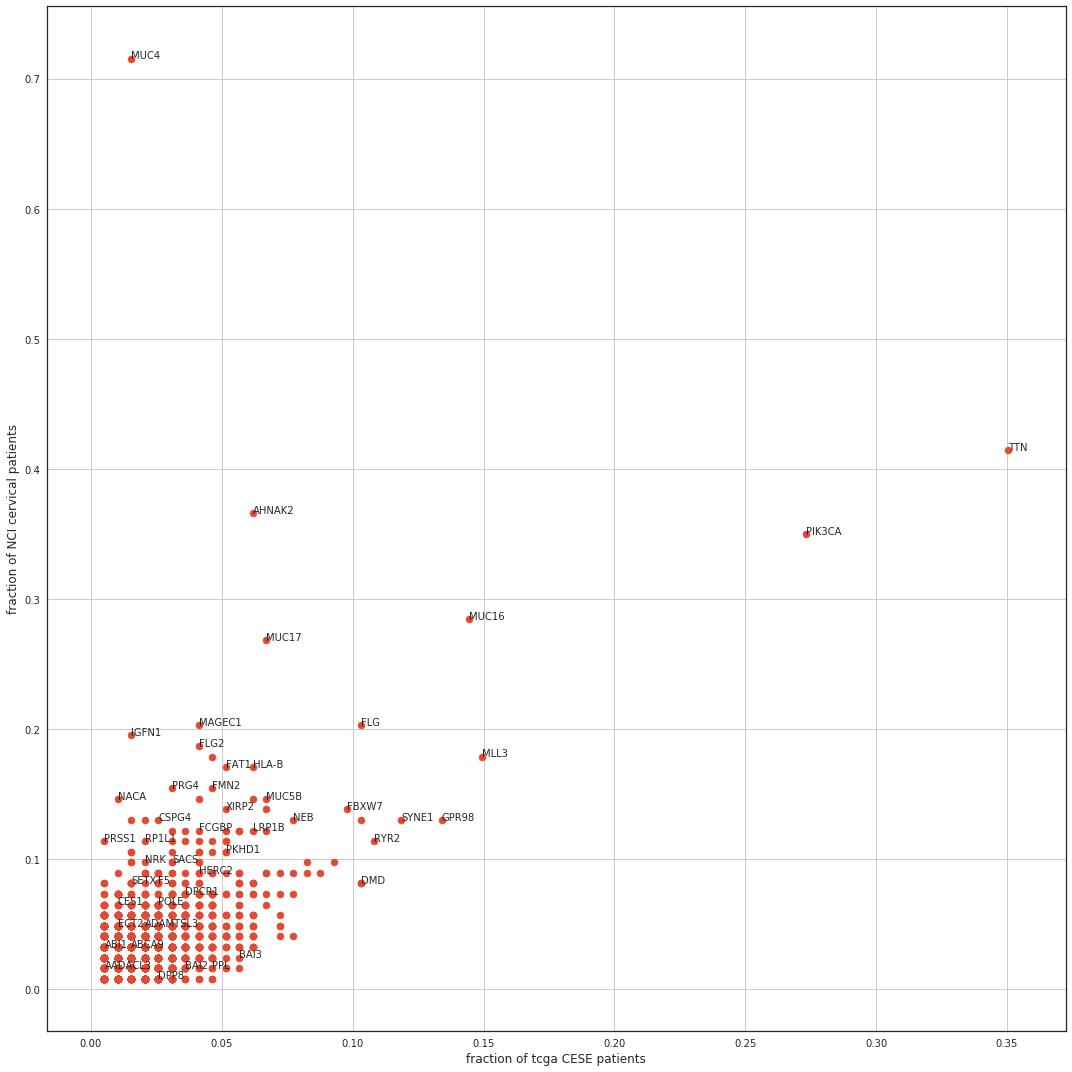

In [89]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(15,15))
    ax = fig.add_subplot(111)
#     fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(x, y)

    ann = []
    n = len(labels)
    for i in range(n):
        xy = [x[i], y[i]]
        fc = x[i]/y[i]
        if max(xy) > 0.1 or fc > 2 or fc < 0.5:
            ann.append(ax.annotate(labels[i], xy = (x[i], y[i])))
    mask = np.zeros(fig.canvas.get_width_height(), bool)
    plt.tight_layout()
    fig.canvas.draw()

    for a in ann:
        bbox = a.get_window_extent()
        x0 = int(bbox.x0)
        x1 = int(math.ceil(bbox.x1))
        y0 = int(bbox.y0)
        y1 = int(math.ceil(bbox.y1))

        s = np.s_[x0:x1+1, y0:y1+1]
        if np.any(mask[s]):
            a.set_visible(False)
        else:
            mask[s] = True

    plt.xlabel('fraction of tcga CESE patients')
    plt.ylabel('fraction of NCI cervical patients')
    plt.tight_layout()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/tcga_nci_percent_patient_mutated_Mya.png'
plt.savefig(of, dpi=300)
plt.show()

# look at number of genes with splicing mutations

In [3]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_variants/tcga.genome.wustl.edu_CESC.IlluminaGA_DNASeq_curated.Level_2.1.0.0.somatic.maf'
df = pd.read_csv(f, sep='\t')
df.head(2)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gene_name_source,gene_name_source.1,tumor_ref_reads,tumor_var_reads,tumor_vaf,normal_ref_reads,normal_var_reads,normal_vaf,dbSNP_rsID,GMAF
0,A1BG,1,genome.wustl.edu,37,19,58864353,58864353,+,Missense_Mutation,SNP,...,HGNC,ENSG00000121410,93,80,46.24,170,0,0.0,NaN,NaN
1,A1BG-AS1,503538,genome.wustl.edu,37,19,58864179,58864179,+,RNA,SNP,...,HGNC,ENSG00000268895,81,12,12.90,30,0,0.0,NaN,NaN


In [4]:
df.Variant_Classification.unique()

array(['Missense_Mutation', 'RNA', 'Silent', 'Nonsense_Mutation',
       'Splice_Site', 'In_Frame_Del', 'Frame_Shift_Del',
       'Frame_Shift_Ins', 'Nonstop_Mutation', 'In_Frame_Ins'],
      dtype=object)

In [6]:
df1 = df.query('Variant_Classification == "{}"'.format('Splice_Site'))
df1.shape

(574, 66)

In [11]:
genes_with_splicing_site_muts = df1.Hugo_Symbol.unique()

In [12]:
all_genes = df.Hugo_Symbol.unique()

In [15]:
len(genes_with_splicing_site_muts)


536

In [16]:
len(all_genes)

16453

In [ ]:
len(genes_with_splicing_site_muts)/len(all_genes)

In [90]:
#  snv summary file
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/HIGH_MODERATE_SNV_summary_with_normal_with_AF_filtered_somatic.tsv'
df1 = pd.read_csv(f, sep='\t', usecols=['gene', 'patient_ID', 'snpeff_details'])

df1.head(2)

,gene,patient_ID,snpeff_details
0,SAMD11,HTMCP-03-06-02007,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|ttC/tt...
1,SAMD11,HTMCP-03-06-02214,NON_SYNONYMOUS_CODING(MODERATE|MISSENSE|Ccc/Tc...


In [91]:
df1['yyy'] = df1.snpeff_details.str.split('(', 1, expand=True)[0]

In [92]:
# remember to escape the special characters like + -
df1['xxx'] = df1.yyy\
.str.replace('splice_donor_variant\+splice_region_variant\+splice_region_variant\+intron_variant\+non_coding_exon_variant', 'splicing_site')\
.str.replace('frameshift_variant\+splice_donor_variant\+splice_region_variant\+splice_region_variant\+intron_variant', 'splicing_site')\
.str.replace('splice_donor_variant\+disruptive_inframe_deletion\+splice_region_variant\+intron_variant' ,'splicing_site')\
.str.replace('missense_variant\+splice_region_variant', 'splicing_site')\
.str.replace('splice_acceptor_variant\+intron_variant', 'splicing_site')\
.str.replace('splice_donor_variant\+intron_variant', 'splicing_site')\
.str.replace('SPLICE_SITE_ACCEPTOR', 'splicing_site')\
.str.replace('SPLICE_SITE_DONOR', 'splicing_site')

In [93]:
df1.xxx.str.split('(', 1, expand=True)[0].unique()

array(['NON_SYNONYMOUS_CODING', 'STOP_GAINED', 'missense_variant',
       'STOP_LOST', 'splicing_site', 'stop_gained', 'START_LOST',
       'start_lost', 'stop_lost'], dtype=object)

In [98]:
df1_genes = df1.query('xxx == "{}"'.format('splicing_site'))['gene'].unique()

In [99]:
# indel summary file
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/HIGH_MODERATE_INDEL_summary_with_normal_strelka_indels_only.tsv'
df2 = pd.read_csv(f, sep='\t', usecols=['gene', 'patient_ID',  'snpeff_details'])
df2.head(2)

,gene,patient_ID,snpeff_details
0,PCNT,HTMCP-03-06-02448,CODON_DELETION(MODERATE||caggag/cag|QE2573Q|33...
1,MLL3,HTMCP-03-06-02097,FRAME_SHIFT(HIGH||-|-1823|4911|MLL3|protein_co...


In [100]:
df2['yyy'] = df2.snpeff_details.str.split('(', 1, expand=True)[0]


In [101]:
# remember to escape the special characters like + -
df2['xxx'] = df2.yyy\
.str.replace('splice_donor_variant\+splice_region_variant\+splice_region_variant\+intron_variant\+non_coding_exon_variant', 'splicing_site')\
.str.replace('frameshift_variant\+splice_donor_variant\+splice_region_variant\+splice_region_variant\+intron_variant', 'splicing_site')\
.str.replace('splice_donor_variant\+disruptive_inframe_deletion\+splice_region_variant\+intron_variant' ,'splicing_site')\
.str.replace('missense_variant\+splice_region_variant', 'splicing_site')\
.str.replace('splice_acceptor_variant\+intron_variant', 'splicing_site')\
.str.replace('splice_donor_variant\+intron_variant', 'splicing_site')\
.str.replace('SPLICE_SITE_ACCEPTOR', 'splicing_site')\
.str.replace('SPLICE_SITE_DONOR', 'splicing_site')

In [102]:
df2.xxx.str.split('(', 1, expand=True)[0].unique()

array(['CODON_DELETION', 'FRAME_SHIFT', 'splicing_site',
       'CODON_CHANGE_PLUS_CODON_DELETION',
       'CODON_CHANGE_PLUS_CODON_INSERTION', 'frameshift_variant',
       'disruptive_inframe_deletion', 'inframe_deletion',
       'CODON_INSERTION', 'STOP_GAINED', 'frameshift_variant+stop_gained'],
      dtype=object)

In [104]:
df2_genes = df2.query('xxx == "{}"'.format('splicing_site'))['gene'].unique()

In [109]:
pd.Series(df1_genes.tolist() + df2_genes.tolist()).nunique()

1183

In [1]:
1308/63260

0.020676572873853938

In [2]:
574/46548

0.012331356878920684